In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Function to generate primary user signals
def generate_primary_user_signals(num_signals, num_samples):
    # Simulate primary user signals (replace with actual signal generation code)
    primary_signals = np.random.randn(num_signals, num_samples)
    return primary_signals

# Function to generate secondary user signals
def generate_secondary_user_signals(num_signals, num_samples):
    # Simulate secondary user signals (replace with actual signal generation code)
    secondary_signals = np.random.randn(num_signals, num_samples)
    return secondary_signals

# Generate dataset
num_samples = 1024  # Number of samples per OFDM signal
num_primary_signals = 1000
num_secondary_signals = 1000

primary_signals = generate_primary_user_signals(num_primary_signals, num_samples)
secondary_signals = generate_secondary_user_signals(num_secondary_signals, num_samples)

# Label the dataset
X = np.vstack((primary_signals, secondary_signals))
y = np.hstack((np.zeros(num_primary_signals), np.ones(num_secondary_signals)))

# Shuffle dataset
shuffle_indices = np.random.permutation(len(X))
X_shuffled = X[shuffle_indices]
y_shuffled = y[shuffle_indices]

# Split dataset into training and testing sets
split_ratio = 0.8
num_train_samples = int(split_ratio * len(X_shuffled))

X_train = X_shuffled[:num_train_samples]
X_test = X_shuffled[num_train_samples:]
y_train = y_shuffled[:num_train_samples]
y_test = y_shuffled[num_train_samples:]

# Save datasets to disk
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load datasets from disk
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Step 2: Data Preprocessing (No actual preprocessing in this example)
# No feature extraction or normalization in this example

# Step 3: Model Training
# Split dataset into training and testing sets (not required here as data is already split)
# Train SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict labels for test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Deployment (Not applicable in this code snippet)
# This code snippet focuses on model training and evaluation only


Accuracy: 0.5025


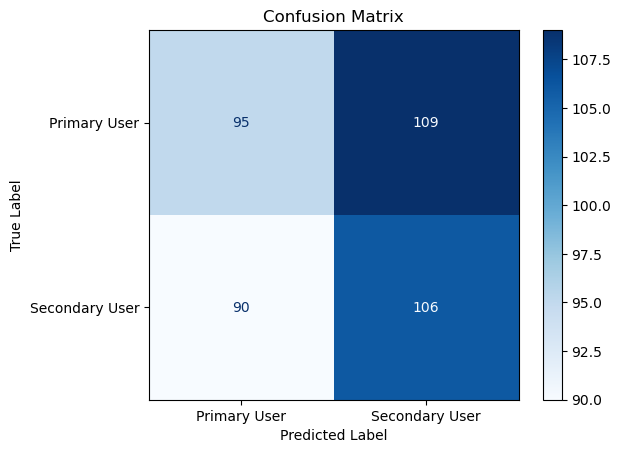

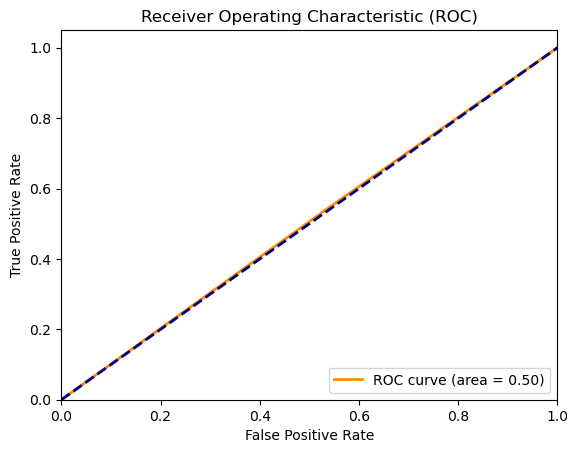

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# Step 4: Model Evaluation

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Primary User', 'Secondary User'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
